In [64]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [51]:
image_path = '/Users/hongseunghyeog/Downloads/R658x0.q70.jpeg'
image = cv2.imread(image_path)
#Selected Search객체 생성
s_search = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
s_search.setBaseImage(image)

Selected Search 객체 생성

In [52]:
s_search.switchToSelectiveSearchQuality()

In [53]:
rois = s_search.process()
print(len(rois))
output_image = image.copy()
showRois = 100

4037


### 사진에 영역 표시

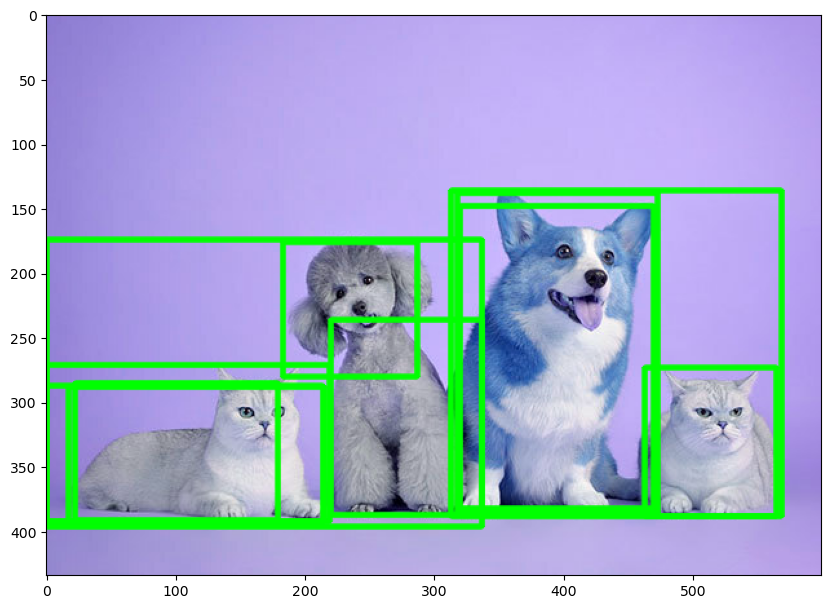

In [89]:
#최소 너비,높이/최대 너비,높이 설정
min_width, min_height = 100, 100 
max_width, max_height = 400, 400
deleted_rois=[]
count=0
for i,roi in enumerate(rois):
    if i < showRois:
        x,y,w,h = roi
        if(min_width <= w <= max_width and min_height <= h <= max_height):
            deleted_rois.append([x,y,w,h])
            cv2.rectangle(output_image,(x,y),(x+w,y+h),(0,255,0),2,cv2.LINE_AA)
            count+=1
    else:
        break
# print(count)
# print(deleted_rois)
plt.figure(figsize=(10,10))
plt.imshow(output_image)
# print(type(rois))
# print(type(deleted_rois))

### 각 영역을 모델에 넣기 위해 전처리 진행후에 roi_tensor에 저장

In [86]:
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)
loaded_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


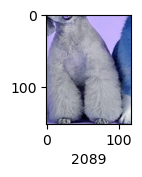

In [93]:
i=0
for rect in deleted_rois[:len(deleted_rois)]:
    x,y,w,h = rect
    roi = image[y:y+h,x:x+w]
    roi_resize = cv2.resize(roi,(224,224))
    roi_tensor = tf.convert_to_tensor(roi_resize)
    roi_tensor = tf.expand_dims(roi_tensor, axis=0)
    plt.subplot(3,3,i+1)
    plt.imshow(roi)
    predictions = loaded_model.predict(roi_tensor)
    predicted_class = np.argmax(predictions)
    plt.xlabel(predicted_class)